In [ ]:
#read the packages
#read the data
#separate categorical and numerical columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df = pd.read_csv(r'C:\Users\saina\Documents\DataScience\Datafiles\Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [ ]:
1) Everyday we will work on Visa dataset
2) The same analysis you need to perform on Bank dataset
3) Analytics Vidya Hackathon (will pick one dataset)


In [8]:
visa_df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [3]:
cat_columns = [key for key, value in dict(visa_df.dtypes).items() if value =='object' ]
num_columns = [key for key, value in dict(visa_df.dtypes).items() if value !='object' ]
cat_columns, num_columns

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [14]:
cat_columns = visa_df.select_dtypes(include='object').columns
num_columns = visa_df.select_dtypes(exclude='object').columns
cat_columns, num_columns

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

In [16]:
visa_df['continent']    # Series types

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [18]:
visa_df[['continent']]     # Dataframe types

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


In [19]:
visa_df.loc[:,'continent']   # series data type

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [20]:
visa_df.loc[:,['continent']]   # series data type

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


In [ ]:
visa_df['continent']    # series type
visa_df[['continent']]  # dataframe
visa_df.continent       # series type
visa.loc[:,['continent']] # dataframe

**Read multiple columns**
- When ever we see multiplet means recall the list
- Keep the columns in a list 
- pass that list


In [23]:
cols = visa_df[['continent','case_status']]
cols

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


$Task-1$

**We want to find the number of applicants continetn wise**
- There is an Asia continent is there
- How many applicants are from Asia out of 25480 applicants

**unique**

- unique will provide how many unique values are available in a particular column

In [26]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [27]:
len(visa_df['continent'].unique())

6

**nunique**

- gives count of unique items

In [29]:
visa_df['continent'].nunique()

6

In [31]:
condition = visa_df['continent'] == 'Asia'
condition

0         True
1         True
2         True
3         True
4        False
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: continent, Length: 25480, dtype: bool

In [32]:
visa_df[condition]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [33]:
len(visa_df[condition])

16861

In [35]:
# Step-1 Read the data with specific column
# Step-2: Apply the condition
#         When we apply the condition python will give True and False
# Step-3: In order to retrieve the True data
#         <dataframe_name[<condition>]

visa_df['continent']
cond = visa_df['continent'] == 'Asia'
len(visa_df[cond])

16861

In [36]:
len(visa_df[visa_df['continent'] == 'Asia'])

16861

In [38]:
# If we have to get the count of each continent when we need to use for loop

for i in visa_df['continent'].unique():
    print(i, len(visa_df[visa_df['continent'] == i]))


Asia 16861
Africa 551
North America 3292
Europe 3732
South America 852
Oceania 192


$Task-2$

- Now instead of printing count, take empty list
- and same the values in a emppty list
- We already have unique continent list using unique method
Create dataframe

In [39]:
l1 = visa_df['continent'].unique()
l2 = []
for i in visa_df['continent'].unique():
    l2.append(len(visa_df[visa_df['continent'] == i]))

cont_df = pd.DataFrame(zip(l1,l2), columns=['Continent', 'Count'])
cont_df

,Continent,Count
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [40]:
cont_df.to_csv('continents_df.csv', index=False)

**Value Counts**

In [41]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [42]:
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [83]:
for i in cat_columns:

    l1 = visa_df[i].unique()
    l2 = []
    for j in visa_df[i].unique():
        if i == 'case_id':
            pass
        else:
            l2.append(len(visa_df[visa_df[i] == j]))
    cont_df = pd.DataFrame(zip(l1,l2), columns=[i, 'Count'])
    print(cont_df, end='\n\n')
    cont_df.to_csv(i+".csv", index=False)
    l2.clear()

Empty DataFrame
Columns: [case_id, Count]
Index: []

       continent  Count
0           Asia  16861
1         Africa    551
2  North America   3292
3         Europe   3732
4  South America    852
5        Oceania    192

  education_of_employee  Count
0           High School   3420
1              Master's   9634
2            Bachelor's  10234
3             Doctorate   2192

  has_job_experience  Count
0                  N  10678
1                  Y  14802

  requires_job_training  Count
0                     N  22525
1                     Y   2955

  region_of_employment  Count
0                 West   6586
1            Northeast   7195
2                South   7017
3              Midwest   4307
4               Island    375

  unit_of_wage  Count
0         Hour   2157
1         Year  22962
2         Week    272
3        Month     89

  full_time_position  Count
0                  Y  22773
1                  N   2707

  case_status  Count
0      Denied   8462
1   Certified  17018



In [82]:
# This is for loading Bank data file.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bank_df = pd.read_csv(r"C:\Users\saina\Documents\DataScience\Datafiles\bank.csv", delimiter=";")
bcat_columns = [key for key,value in dict(bank_df.dtypes).items() if value =='object']

for i in bcat_columns:

    l1 = bank_df[i].unique()
    l2 = []
    for j in bank_df[i].unique():
        l2.append(len(bank_df[bank_df[i] == j]))
    cont_df = pd.DataFrame(zip(l1,l2), columns=[i, 'Count'])
    print(cont_df, end='\n\n')
    cont_df.to_csv(i+".csv", index=False)
    l2.clear()

              job  Count
0      unemployed    128
1        services    417
2      management    969
3     blue-collar    946
4   self-employed    183
5      technician    768
6    entrepreneur    168
7          admin.    478
8         student     84
9       housemaid    112
10        retired    230
11        unknown     38

    marital  Count
0   married   2797
1    single   1196
2  divorced    528

   education  Count
0    primary    678
1  secondary   2306
2   tertiary   1350
3    unknown    187

  default  Count
0      no   4445
1     yes     76

  housing  Count
0      no   1962
1     yes   2559

  loan  Count
0   no   3830
1  yes    691

     contact  Count
0   cellular   2896
1    unknown   1324
2  telephone    301

   month  Count
0    oct     80
1    may   1398
2    apr    293
3    jun    531
4    feb    222
5    aug    633
6    jan    148
7    jul    706
8    nov    389
9    sep     52
10   mar     49
11   dec     20

  poutcome  Count
0  unknown   3705
1  failure    490
2    

- We create a dataframe of unique values of a columns and its count

- We created our own way, bu using for loop

- The same operation we can get using **value_counts**

In [86]:
cdf = visa_df['continent'].value_counts()
cdf

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [87]:
dir(cdf)

['Africa',
 'Asia',
 'Europe',
 'Oceania',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__

In [88]:
cdf.items()

In [89]:
for i in cdf.items():
    print(i)

('Asia', 16861)
('Europe', 3732)
('North America', 3292)
('South America', 852)
('Africa', 551)
('Oceania', 192)


In [90]:
cdf.keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [91]:
type(cdf)

pandas.core.series.Series

In [92]:
cdf.values

array([16861,  3732,  3292,   852,   551,   192], dtype=int64)

In [94]:
keys = cdf.keys()
vals = cdf.values
pd.DataFrame(zip(keys,vals))

,0,1
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [98]:
cdf = visa_df['continent'].value_counts()
keys = cdf.keys()
vals = cdf.values
df1 = pd.DataFrame(zip(keys,vals), columns=['Labels', 'Count'])
df1.to_csv('continents1.csv',index=False)

In [104]:
for i in cat_columns:
    print(i)
    if i == 'case_id':
        pass
    else:
        cdf = visa_df[i].value_counts()
        keys = cdf.keys()
        vals = cdf.values
        df1 = pd.DataFrame(zip(keys,vals), columns=['Labels', 'Count'])
        print(df1)
        df1.to_csv(i+'2.csv',index=False)

case_id
continent
          Labels  Count
0           Asia  16861
1         Europe   3732
2  North America   3292
3  South America    852
4         Africa    551
5        Oceania    192
education_of_employee
        Labels  Count
0   Bachelor's  10234
1     Master's   9634
2  High School   3420
3    Doctorate   2192
has_job_experience
  Labels  Count
0      Y  14802
1      N  10678
requires_job_training
  Labels  Count
0      N  22525
1      Y   2955
region_of_employment
      Labels  Count
0  Northeast   7195
1      South   7017
2       West   6586
3    Midwest   4307
4     Island    375
unit_of_wage
  Labels  Count
0   Year  22962
1   Hour   2157
2   Week    272
3  Month     89
full_time_position
  Labels  Count
0      Y  22773
1      N   2707
case_status
      Labels  Count
0  Certified  17018
1     Denied   8462


In [107]:
for i in cat_columns[1:]:
    cdf = visa_df[i].value_counts()
    keys = cdf.keys()
    vals = cdf.values
    df1 = pd.DataFrame(zip(keys,vals), columns=['Labels', 'Count'])
    path = r"C:\Users\saina\Documents\DataScience\EDA\Visa_DF_Counts"
    df1.to_csv(f'{path}\\{i}.csv',index=False)

In [ ]:
def valuecount(i):
for i in cat_columns[1:]:
    cdf = visa_df[i].value_counts()
    keys = cdf.keys()
    vals = cdf.values
    df1 = pd.DataFrame(zip(keys,vals), columns=['Labels', 'Count'])
    path = r"C:\Users\saina\Documents\DataScience\EDA\Visa_DF_Counts"
    df1.to_csv(f'{path}\\{i}.csv',index=False)


**Normaalize**

- Relative Frequecne table
- Will give percentage of lables in the column

In [109]:
cdf=visa_df['continent'].value_counts(normalize=True)
round(cdf*100,2)

continent
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: proportion, dtype: float64

**Bar Chart**

- Bar Chart is the graphical representation of Frequency table
- Bar graph is a plot between count and class
- in order to plot a bar chart we require two columns
    - Categorical column
    - Numerical column
- We already created a frequency table for **cont_df**
    - Here we have cols = ['Continents', 'Count/Number of Applicants']
    - Categorical column is **Continents**
    - Numerical column is **Count/Number of Applicants**
- Package: matplotlib

In [116]:
l1 = visa_df['continent'].unique()
l2 = []
for i in visa_df['continent'].unique():
    l2.append(len(visa_df[visa_df['continent'] == i]))

cont_df = pd.DataFrame(zip(l1,l2), columns=['Continent', 'Number of Applicants'])
cont_df

,Continent,Number of Applicants
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


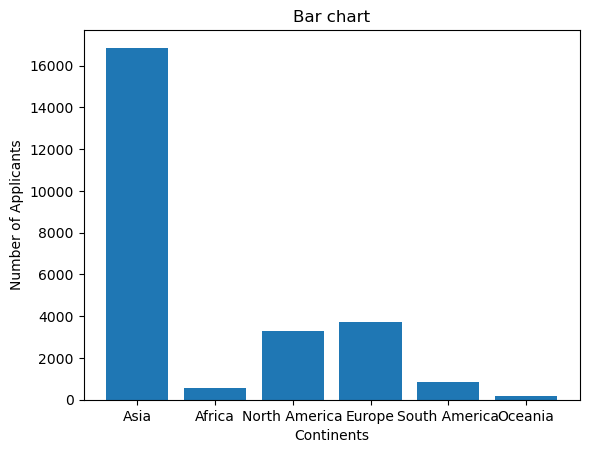

In [120]:
plt.bar('Continent','Number of Applicants', data=cont_df)
plt.title("Bar chart")  # Title of the graph
plt.xlabel('Continents')  # X-axis name
plt.ylabel('Number of Applicants') # Y-axis name
plt.savefig('Continents_bar_chart.jpg')
plt.show()  #Show will avoid the writeup and it should be at last

**Seaborn**

- We can plot bar charts using with many packages
- One package is matplotlib
- Another package is seabron
- In matplotlib the method is **plt.bar**
- In seaborn the method is **countplot**
- In matplotlib,
    - we will take the raw data
    - we will create our frequency table i.e. dataframe
    - we will pass the column1, column2 and dataframe name
- In seaborn countplot
    - It takes direct raw data
    - we will provide direct column name
    - we will provide main dataframe name


<Axes: xlabel='continent', ylabel='count'>

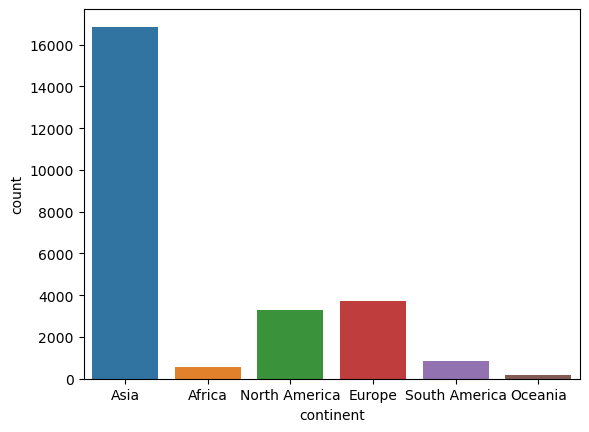

In [123]:
# Continent columns === cont_df === plt.bar
# Continent column directly === visa_df

sns.countplot(data=visa_df, x='continent')

<Axes: xlabel='continent', ylabel='count'>

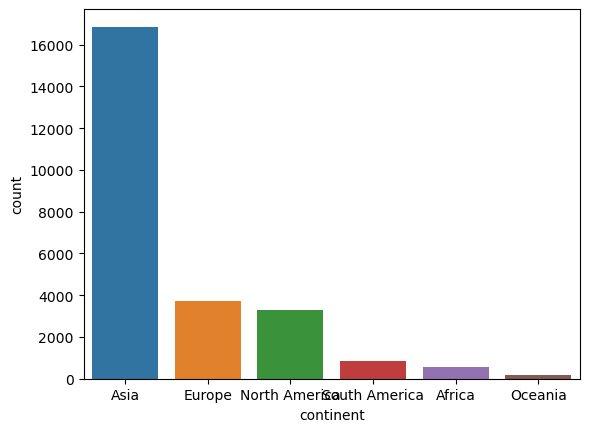

In [124]:
sns.countplot(data=visa_df, x='continent', order=['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Oceania'])

<Axes: xlabel='continent', ylabel='count'>

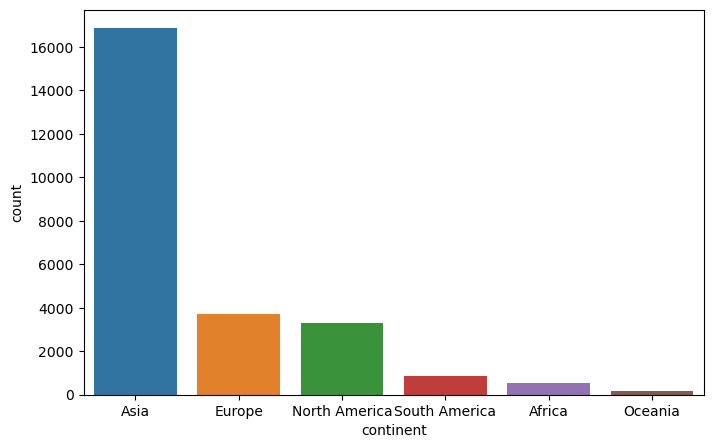

In [125]:
plt.figure(figsize=(8,5)) # 8 units X-axis, and 5 units Y-axis
sns.countplot(data=visa_df, x='continent', order=['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Oceania'])

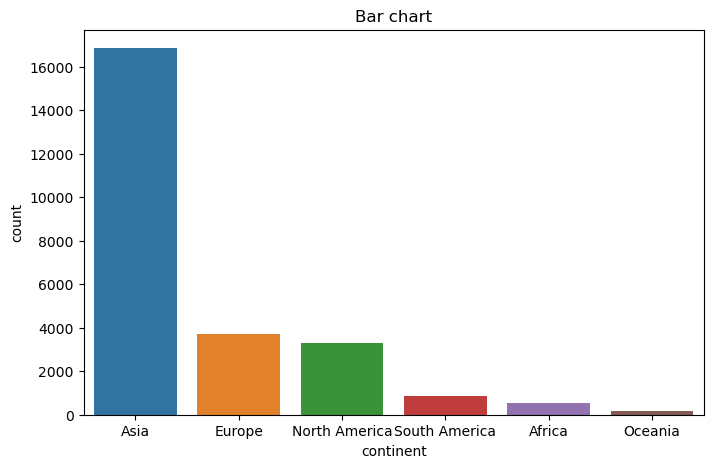

In [127]:
plt.figure(figsize=(8,5)) # 8 units X-axis, and 5 units Y-axis
plt.title("Bar chart")  # Title of the graph
sns.countplot(data=visa_df, x='continent', order=['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Oceania'])
plt.savefig('Continents_bar_chart_using_seaborn.jpg')
plt.show()

In [130]:
visa_df.value_counts('continent').keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

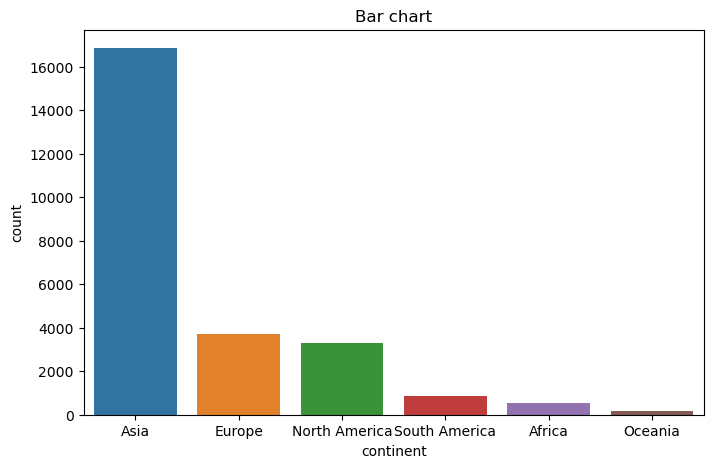

In [4]:
plt.figure(figsize=(8,5)) # 8 units X-axis, and 5 units Y-axis
plt.title("Bar chart")  # Title of the graph
sns.countplot(data=visa_df, x='continent', order=visa_df.value_counts('continent').keys())
plt.savefig('Continents_bar_chart_using_seaborn.jpg')
plt.show()

$Task-3$

**Using for loop plot the bar charts of all the categorical columns**
- We can use seaborn and matplotlib
- Seaborn: countplot requires only raw data, direct column name and main data
- Matplotlib: requires freq table
    - from raw data, will make value_counts()
    - from value_counts() we are making keys and values seperately
    - then we are creating a dataframe
- Start with seaborn
    - then we require categorical columns
    - and main dataframe
- Start with matplotlib
    - We already created a folder "Visa_DF_Counts" in our laptop 

**How to create a folder**

In [7]:
import os

os.getcwd()

'C:\\Users\\saina\\Documents\\DataScience\\EDA'

**os.makedirs()**

- makedirs create a leaf directory
- means it will take the current working directory and creates one extra folder
- here my python file is in **EDA** folder
- Now i want to create a new folder **graphs_seaborn**
- which is one step of EDA folder:  EDA/graphs_seaborn
- pass the full path inside the mkdirs to create the directory

In [8]:
os.makedirs(os.getcwd()+'\\graphs_seaborn')

In [16]:
# Step-1:
root_directory = os.getcwd()

# Step-2:
new_folder = 'graphs_seaborn'

# Step-3:
new_dir = os.path.join(root_directory, new_folder)

# Step-4:
os.makedirs(new_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\saina\\Documents\\DataScience\\EDA\\graphs_seaborn'

In [19]:
try:
    root_directory = os.getcwd()
    new_folder = 'graphs_seaborn'
    new_dir = os.path.join(root_directory, new_folder)
    os.makedirs(new_dir)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\saina\\Documents\\DataScience\\EDA\\graphs_seaborn'


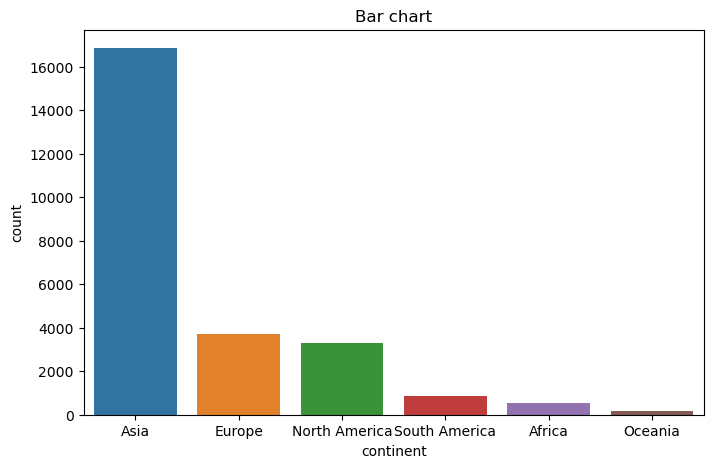

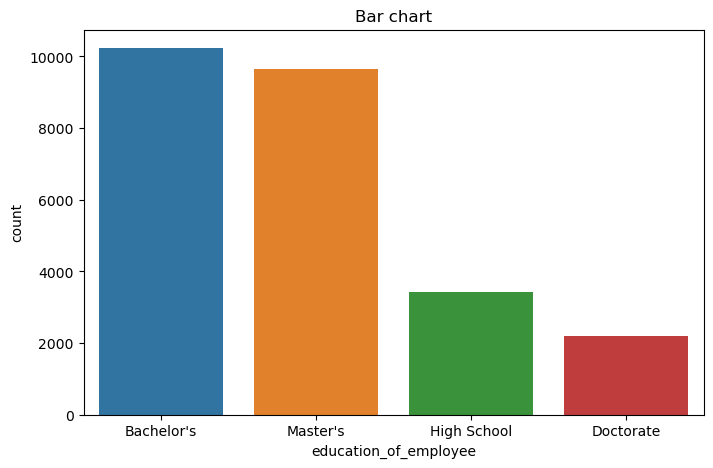

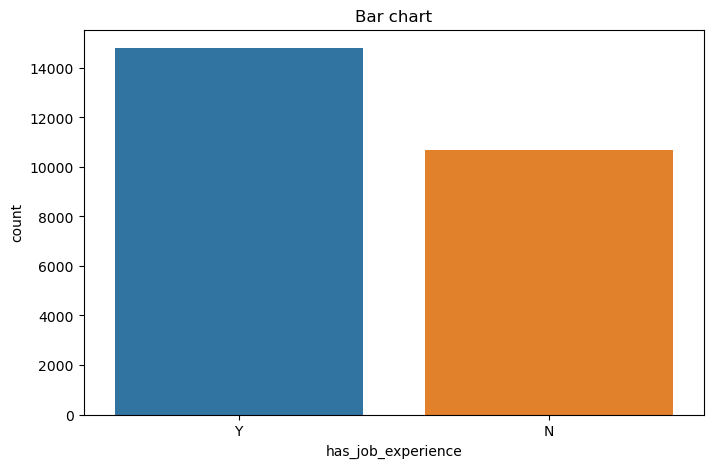

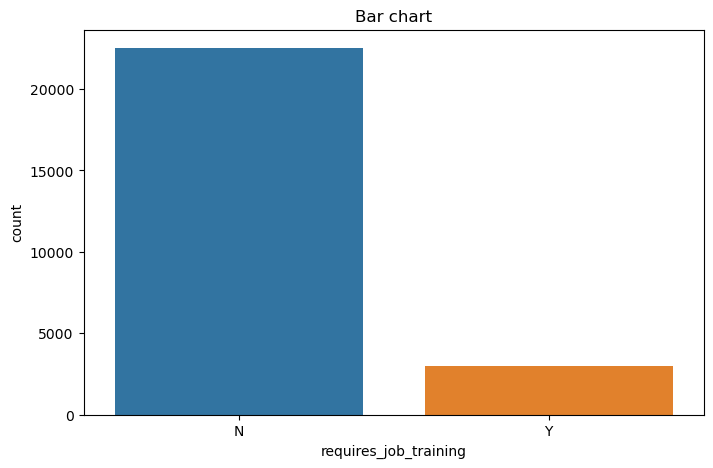

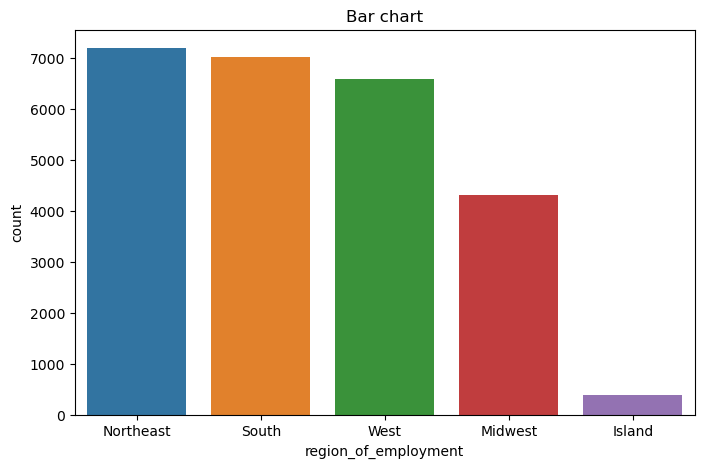

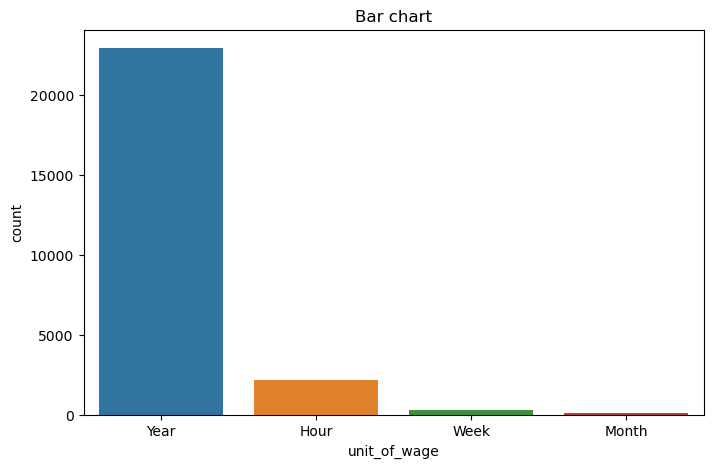

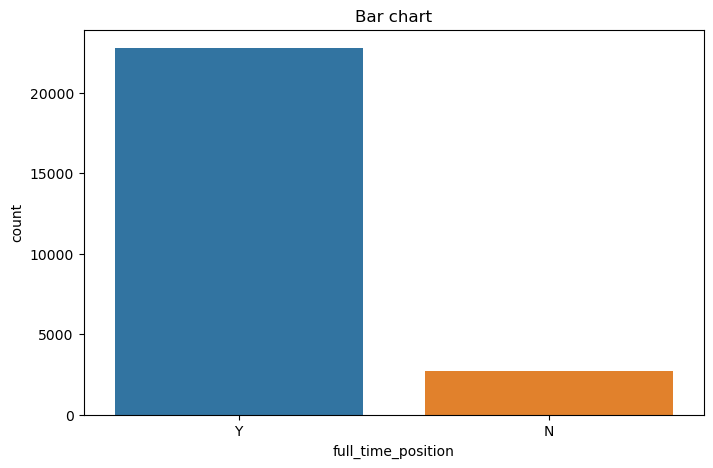

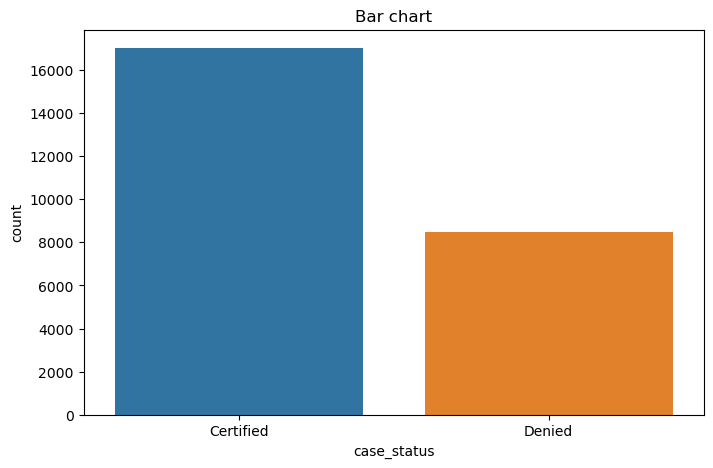

In [21]:
# using seaborn

import seaborn as sns

for cat in cat_columns[1:]:
    plt.figure(figsize=(8,5)) # 8 units X-axis, and 5 units Y-axis
    plt.title("Bar chart")  # Title of the graph
    sns.countplot(data=visa_df, x=cat, order=visa_df.value_counts(cat).keys())
    plt.savefig(f'{new_dir}\{cat}_bar_chart_using_seaborn.jpg')
    plt.show()

In [29]:
try:
    root_directory = os.getcwd()
    new_folder = 'graphs_matplotlib'
    new_dir = os.path.join(root_directory, new_folder)
    os.makedirs(new_dir)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\saina\\Documents\\DataScience\\EDA\\graphs_matplotlib'


**os.listdir()**

In [27]:
root_directory = os.getcwd()
new_folder = 'Visa_DF_Counts'
dir = os.path.join(root_directory, new_folder)
dir

'C:\\Users\\saina\\Documents\\DataScience\\EDA\\Visa_DF_Counts'

In [28]:
dfs=os.listdir(dir)
dfs

['case_status.csv',
 'continent.csv',
 'education_of_employee.csv',
 'full_time_position.csv',
 'has_job_experience.csv',
 'region_of_employment.csv',
 'requires_job_training.csv',
 'unit_of_wage.csv']

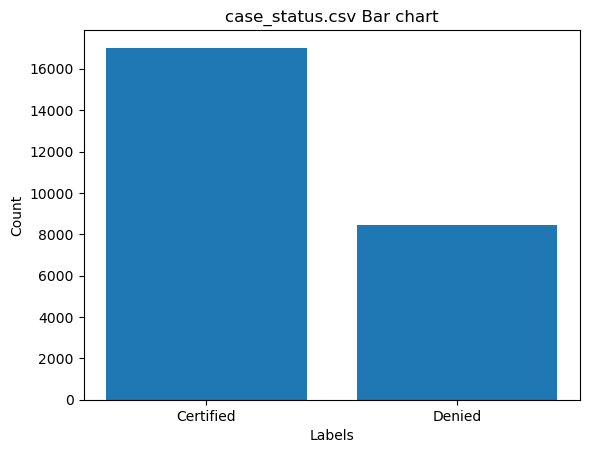

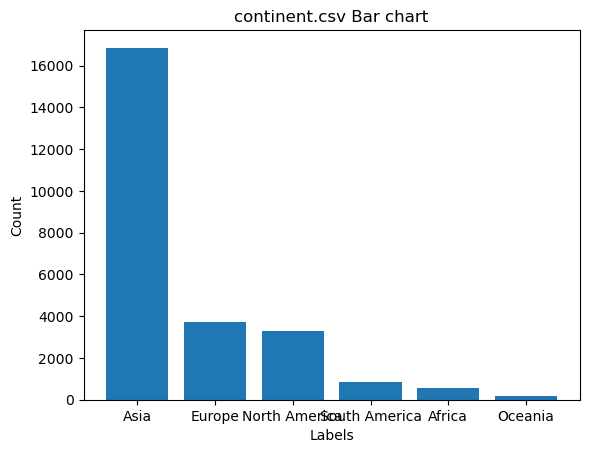

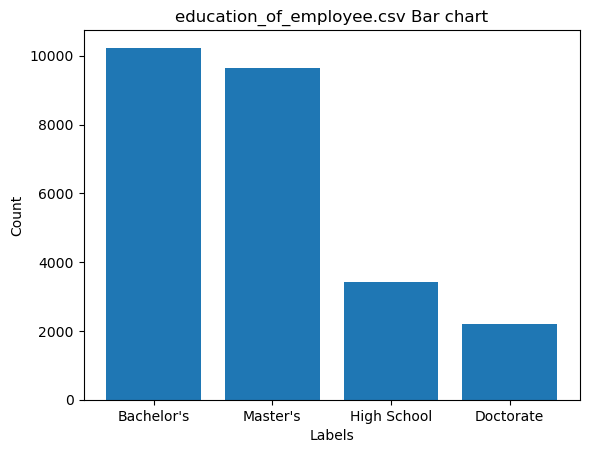

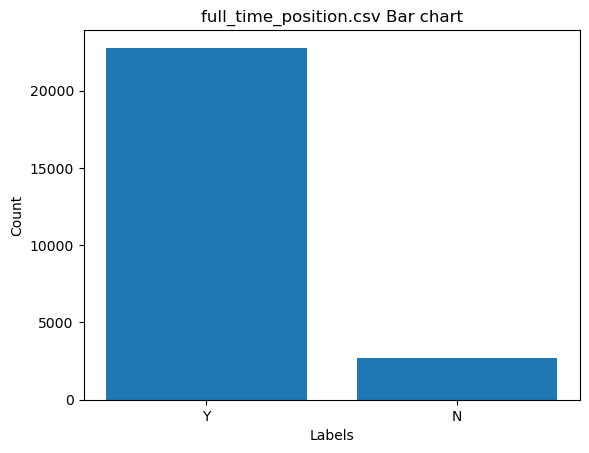

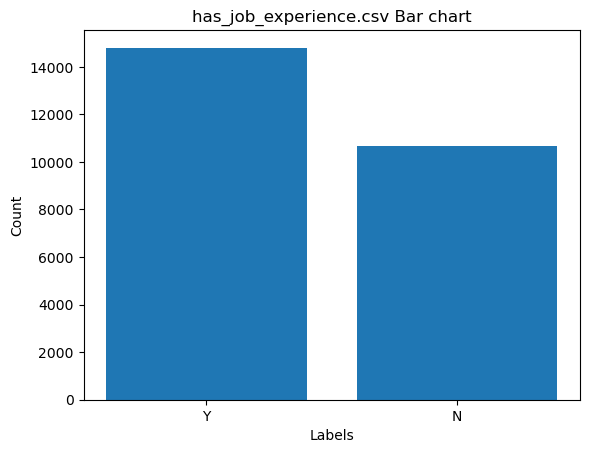

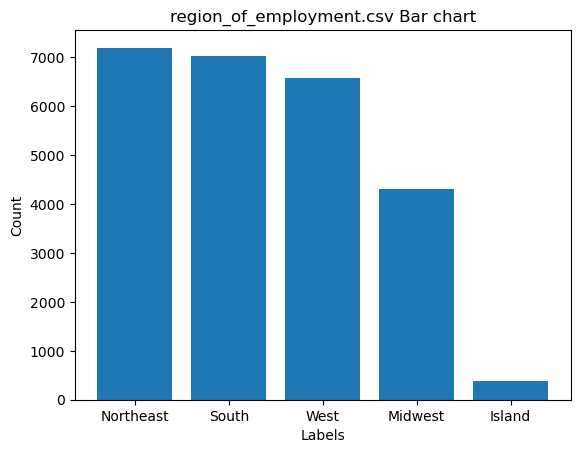

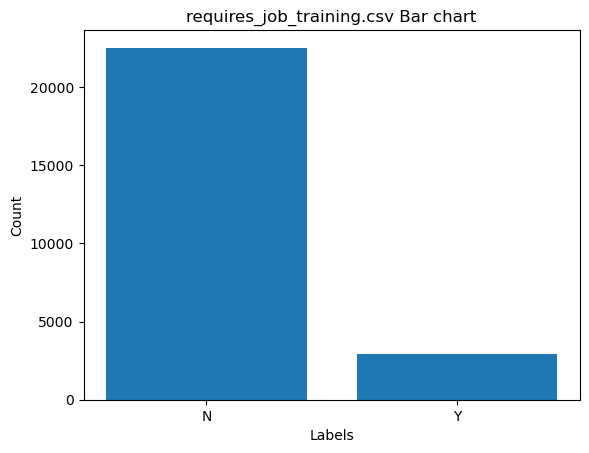

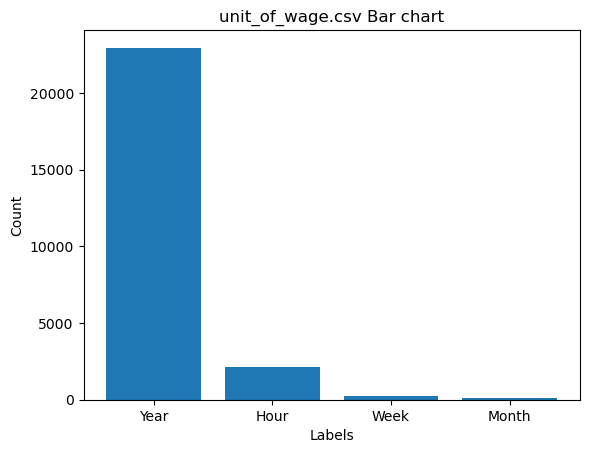

In [39]:
# Using matplotlib

for cat in dfs:
    df=pd.read_csv(f'{dir}\{cat}')
    plt.bar('Labels','Count', data=df)
    plt.title(f"{cat} Bar chart")  # Title of the graph
    plt.xlabel('Labels')  # X-axis name
    plt.ylabel('Count') # Y-axis name
    plt.savefig(f'{new_dir}\\{cat}_bar_chart_using_matplotlib.jpg')
    plt.show()  #Show will avoid the writeup and it should be at last


**subplots**

- If we have multiple plots when we apply for loop it is giving one by one
- It is hard to see all the graphs
- Subplots is kind of a matrix representation
- Suppose we have a 2x2 matrix means 4 values we can plkot
- First plot position represents with (2,2,1)
- Second plot position represents with (2,2,2)
- Third plot position represents with (2,2,3)
- Fourth plot position represents with (2,2,4)


<Axes: >

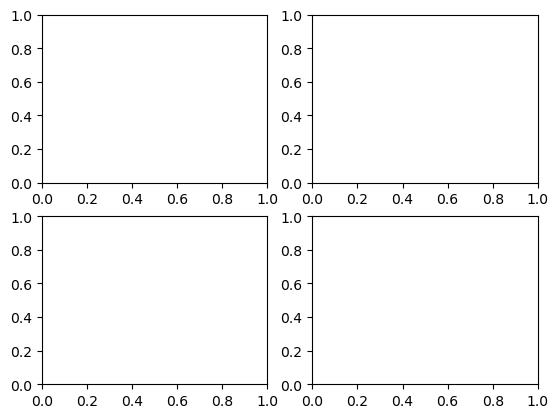

In [42]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

<Axes: >

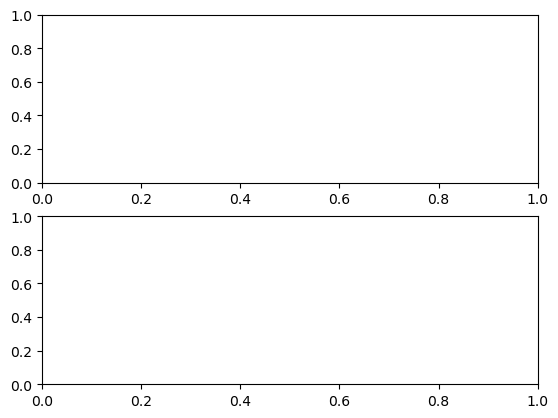

In [43]:
plt.subplot(2,1,1)
plt.subplot(2,1,2)

<Axes: >

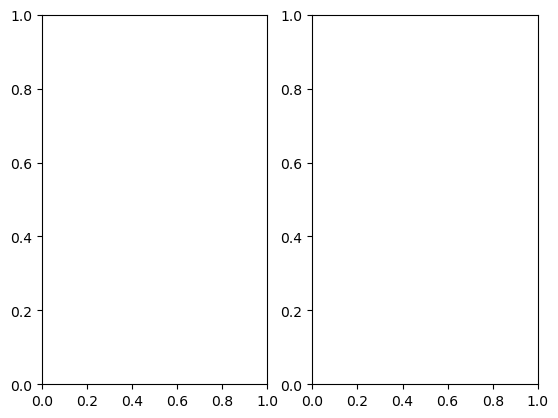

In [44]:
plt.subplot(1,2,1)
plt.subplot(1,2,2)

<Axes: >

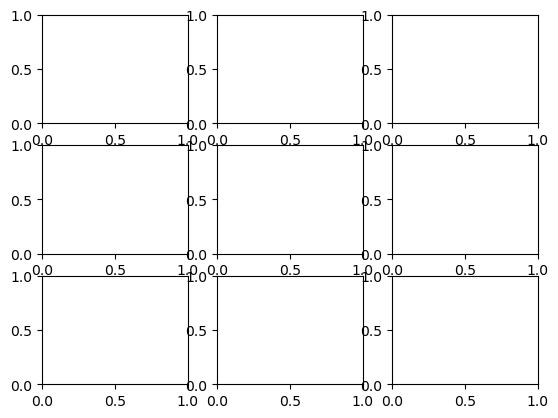

In [45]:
plt.subplot(3,3,1)
plt.subplot(3,3,2)
plt.subplot(3,3,3)
plt.subplot(3,3,4)
plt.subplot(3,3,5)
plt.subplot(3,3,6)
plt.subplot(3,3,7)
plt.subplot(3,3,8)
plt.subplot(3,3,9)

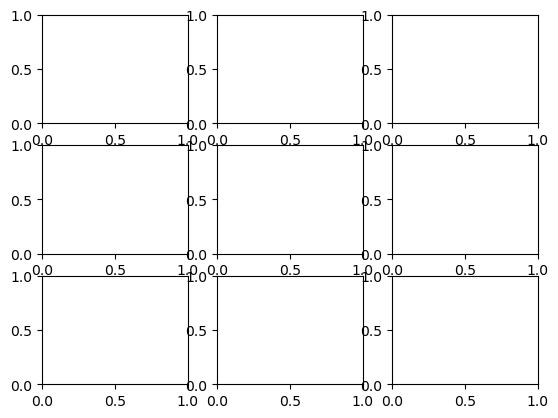

In [46]:
for i in range(1,10):
    plt.subplot(3,3,i)

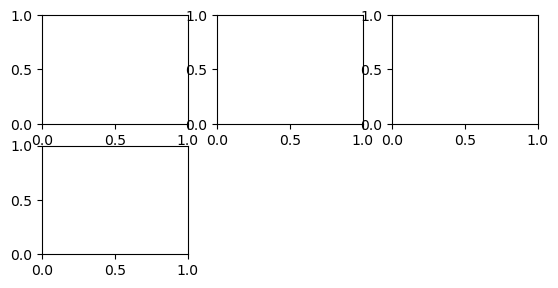

In [47]:
for i in range(1,5):
    plt.subplot(3,3,i)

ValueError: num must be an integer with 1 <= num <= 9, not 10

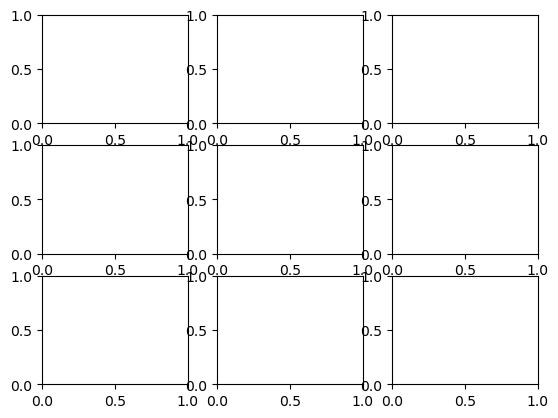

In [48]:
for i in range(1,13):
    plt.subplot(3,3,i)

In [49]:
plt.subplot(2,2,0)

ValueError: num must be an integer with 1 <= num <= 4, not 0

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='case_status', ylabel='count'>

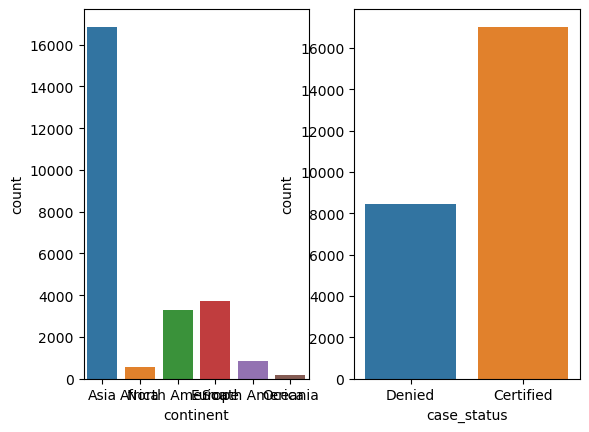

In [52]:
## Task - 1 ##
# Read the data again
# take two columns 1) Continent 2) case status
# Draw the seaborn individually

plt.subplot(1,2,1)
sns.countplot(data=visa_df, x='continent')
plt.subplot(1,2,2)
sns.countplot(data=visa_df, x='case_status')

<Axes: xlabel='case_status', ylabel='count'>

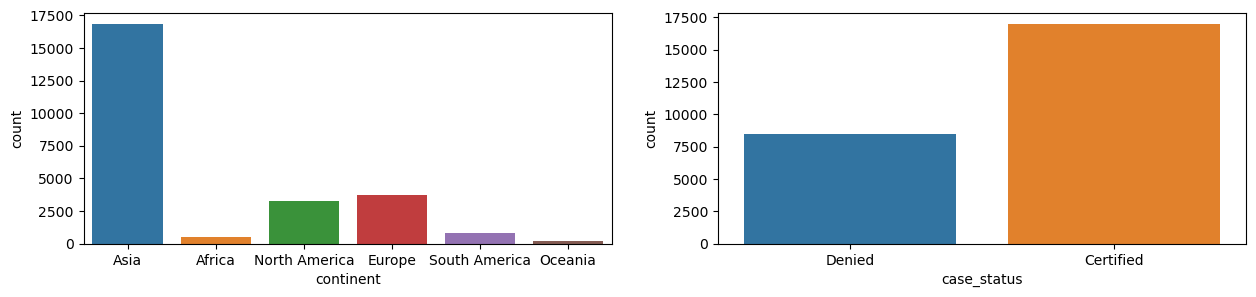

In [58]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(data=visa_df, x='continent')
plt.subplot(1,2,2)
sns.countplot(data=visa_df, x='case_status')

**Task-2**

- Plot the 4 plots
- continent, has_job_experience, requires_job_training, case_status

In [61]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

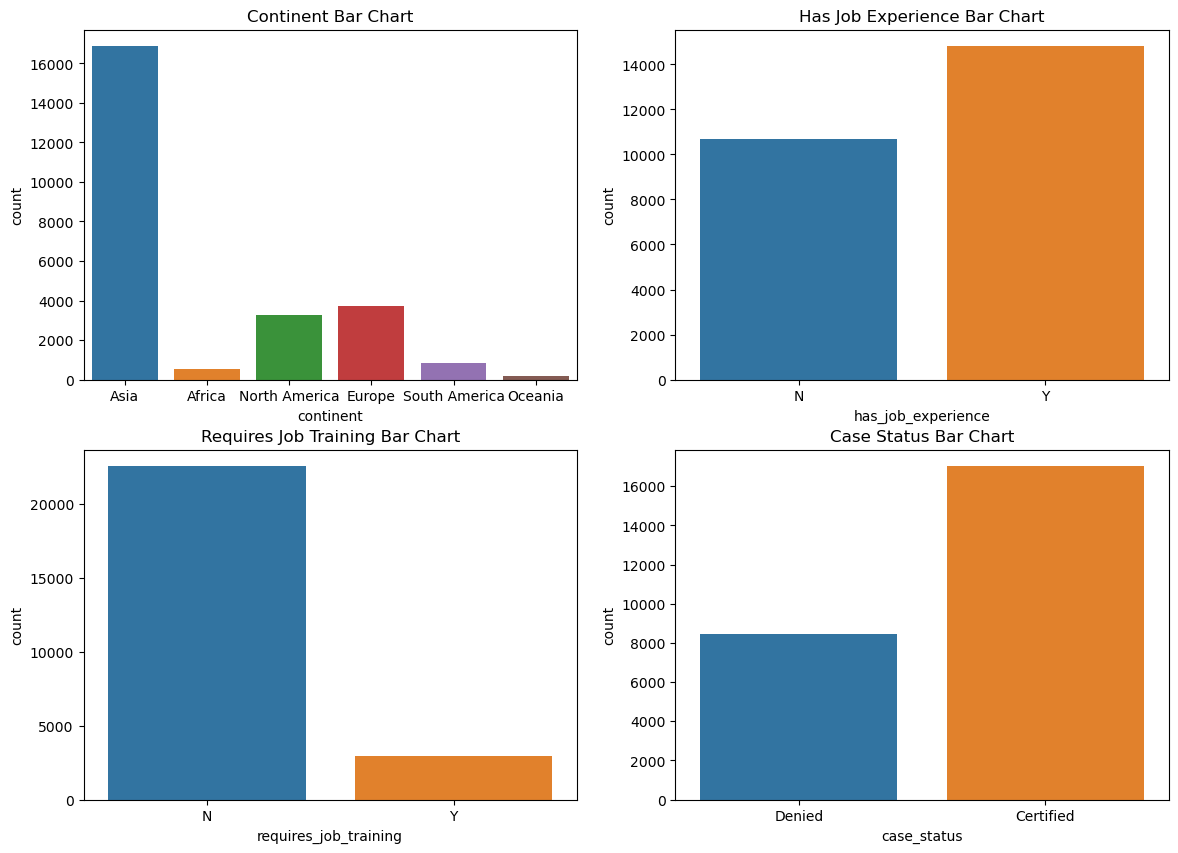

In [65]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.countplot(data=visa_df, x='continent')
plt.title('Continent Bar Chart')

plt.subplot(2,2,2)
sns.countplot(data=visa_df, x='has_job_experience')
plt.title('Has Job Experience Bar Chart')

plt.subplot(2,2,3)
sns.countplot(data=visa_df, x='requires_job_training')
plt.title('Requires Job Training Bar Chart')

plt.subplot(2,2,4)
sns.countplot(data=visa_df, x='case_status')
plt.title('Case Status Bar Chart')

plt.show()

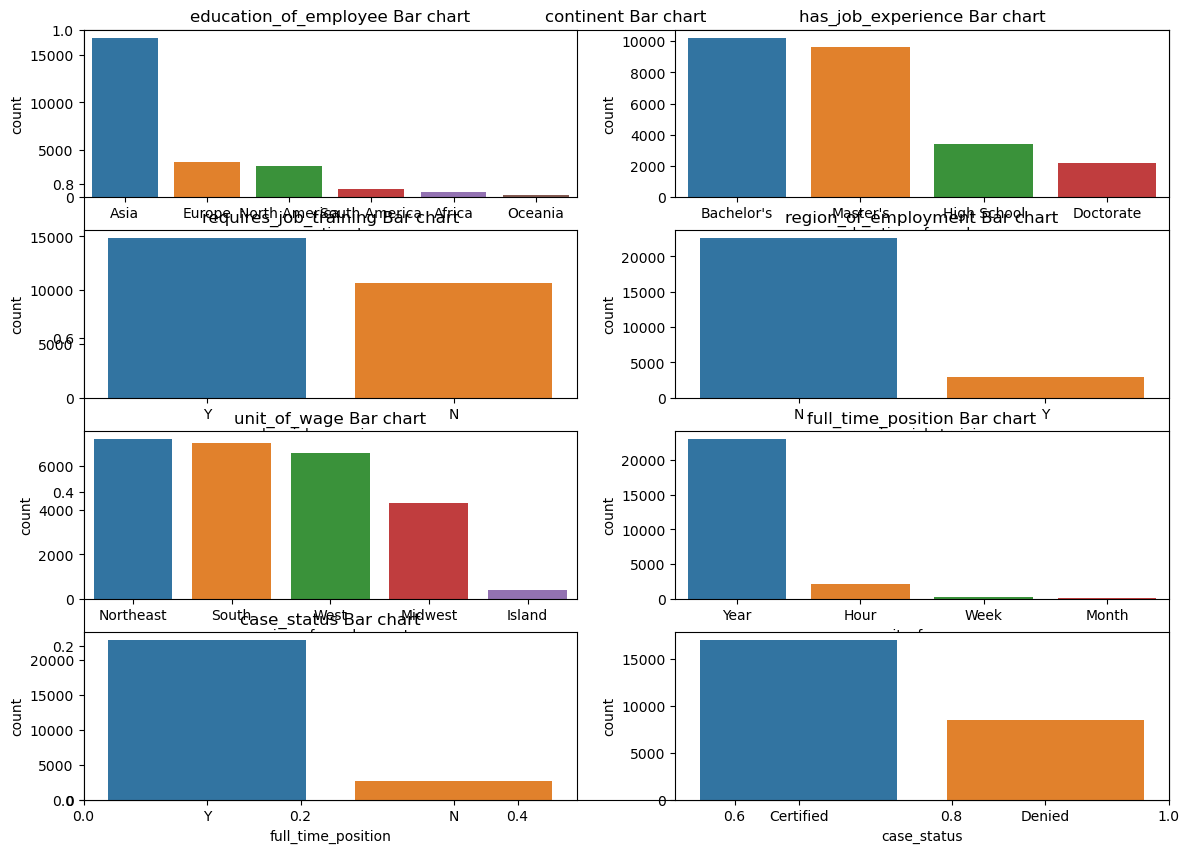

In [74]:
import seaborn as sns
count = 1
plt.figure(figsize=(14,10))
for cat in cat_columns[1:]:
    #plt.figure(figsize=(8,5)) # 8 units X-axis, and 5 units Y-axis
    plt.title(f"{cat} Bar chart")  # Title of the graph
    plt.subplot(4,2,count)
    sns.countplot(data=visa_df, x=cat, order=visa_df.value_counts(cat).keys())
    #plt.savefig(f'{new_dir}\{cat}_bar_chart_using_seaborn.jpg')
    count+=1
plt.show()

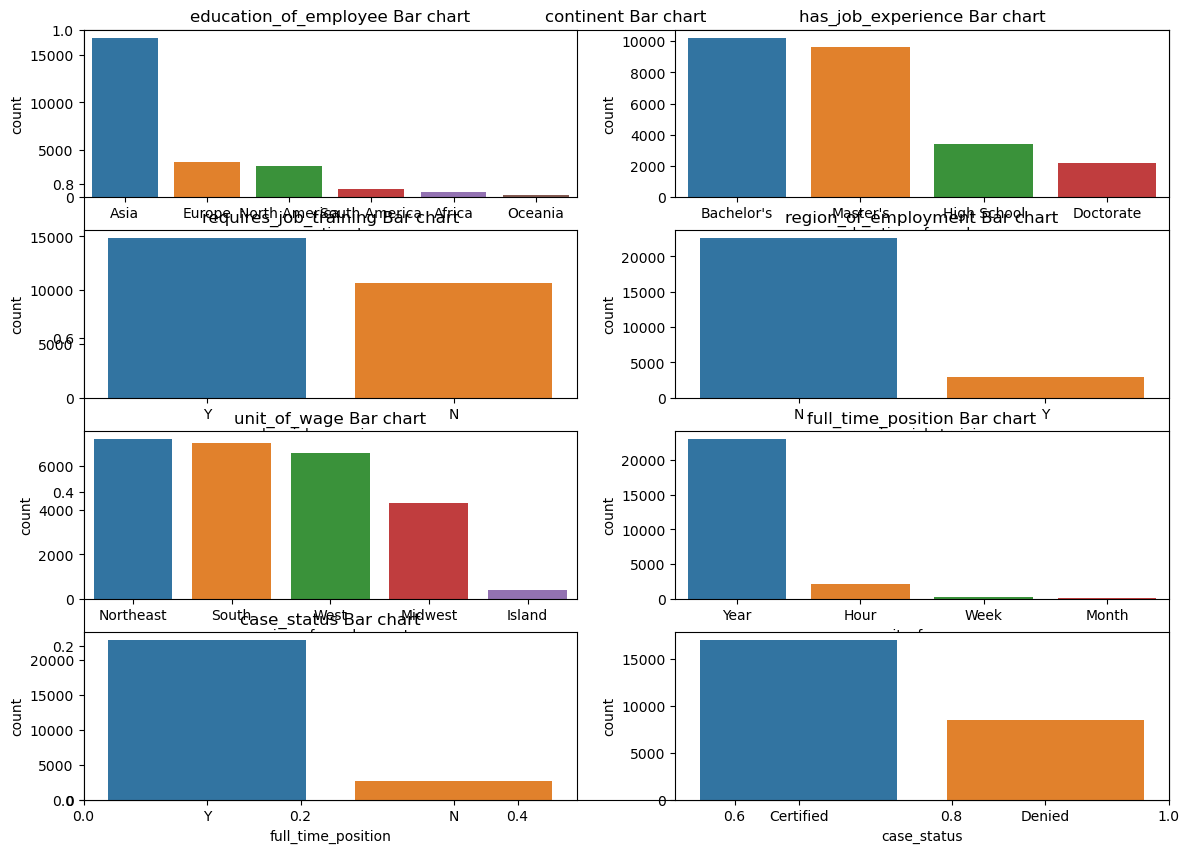

In [92]:
plt.figure(figsize=(14,10))
for i in range(len(cat_columns[1:])):
    plt.title(f"{cat_columns[i+1]} Bar chart")  # Title of the graph
    plt.subplot(4,2,i+1)
    sns.countplot(data=visa_df, x=cat_columns[i+1], order=visa_df.value_counts(cat_columns[i+1]).keys())
plt.show()

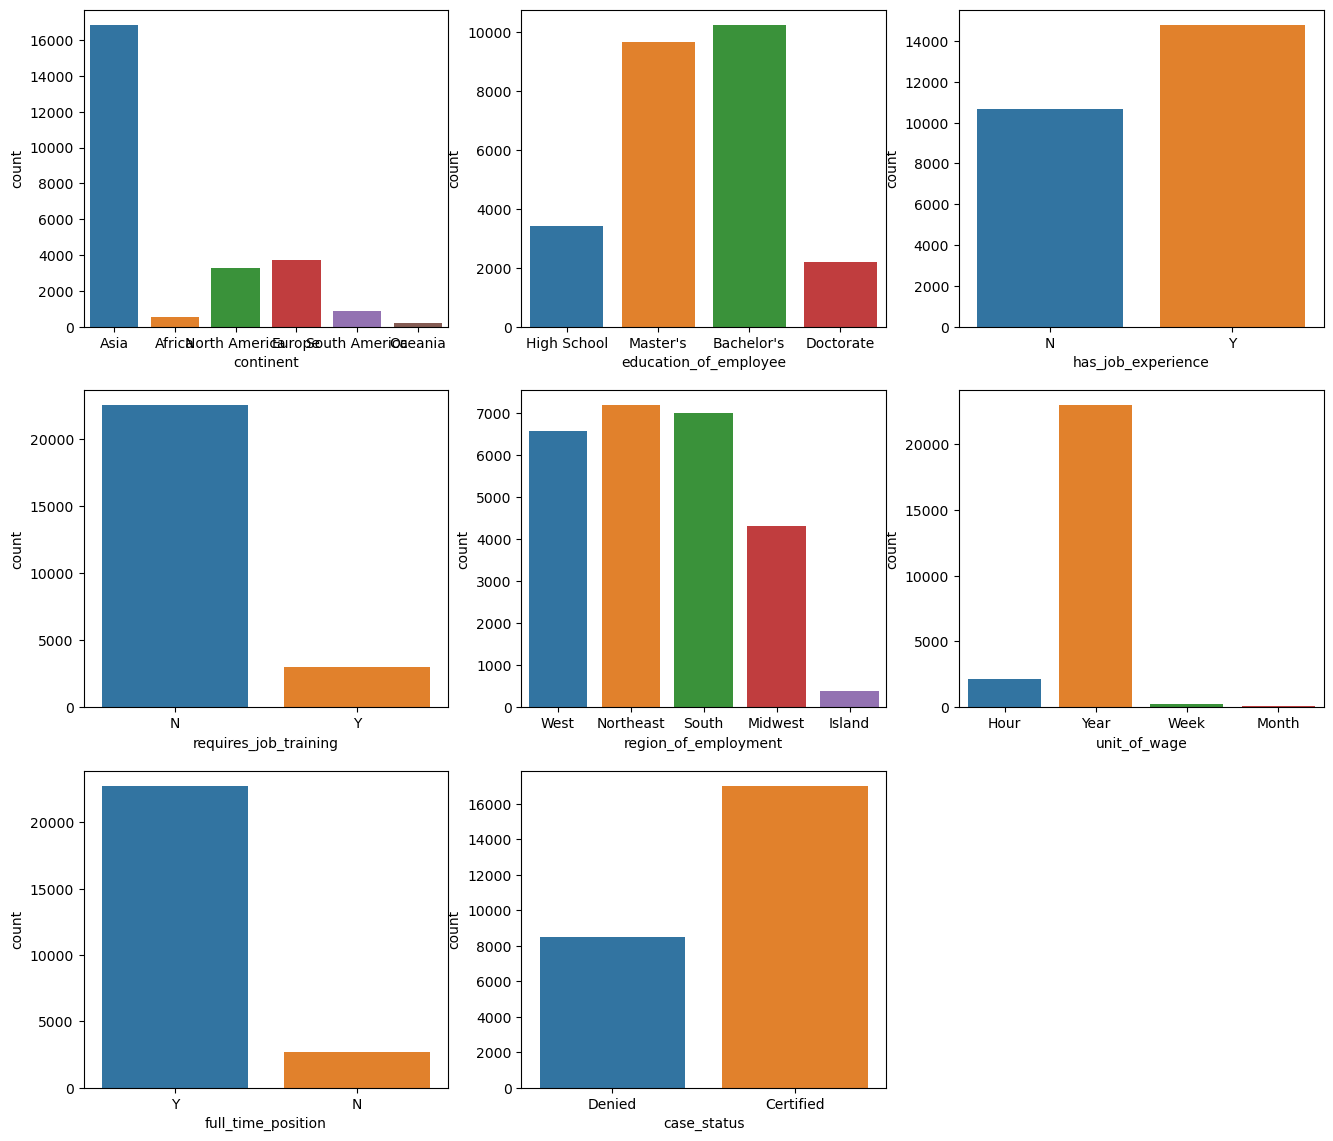

In [82]:
cols=cat_columns[1:]
plt.figure(figsize=(16,14))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=cols[i],data=visa_df)

In [4]:
cat_columns = [key for key, value in dict(visa_df.dtypes).items() if value =='object' ]
num_columns = [key for key, value in dict(visa_df.dtypes).items() if value !='object' ]
cat_columns, num_columns

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [7]:
# Apply the value counts for cat columns
# continent
# save that value counts in a variable
# new_varaible = variable.plot(kind='bar')
# new_variable.bar_label(new_variable.containers[0])
# plot.show()



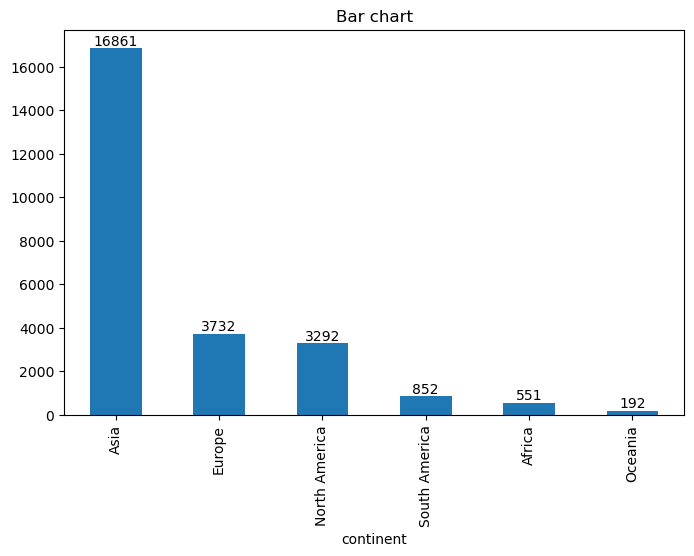

In [13]:
plt.figure(figsize=(8,5)) # 8 units X-axis, and 5 units Y-axis
plt.title("Bar chart")  # Title of the graph
cds  = visa_df.value_counts('continent')
ax = cds.plot(kind='bar')
ax.bar_label(new_variable.containers[0])
plt.show()

In [ ]:
# ALL three plots together (for reference only)

#################################################
# Matplotlib
import matplotlib.pyplot as plt
plt.bar('Continent','Number of Applicants', data=cont_df)
plt.title("Bar chart")  # Title of the graph
plt.xlabel('Continents')  # X-axis name
plt.ylabel('Number of Applicants') # Y-axis name
plt.savefig('Continents_bar_chart.jpg')
plt.show()

#################################################
#seaborn
import seaborn as sns
plt.figure(figsize=(8,5)) # 8 units X-axis, and 5 units Y-axis
plt.title("Bar chart")  # Title of the graph
sns.countplot(data=visa_df, x='continent', order=visa_df.value_counts('continent').keys())
plt.savefig('Continents_bar_chart_using_seaborn.jpg')
plt.show()

#################################################
# Do in single cell using container
plt.figure(figsize=(8,5)) # 8 units X-axis, and 5 units Y-axis
plt.title("Bar chart")  # Title of the graph
cds  = visa_df.value_counts('continent')
ax = cds.plot(kind='bar')
ax.bar_label(new_variable.containers[0])
plt.show()

**Pie Chart**

- Pie chart is a 360 degrees view
- It is under matplotlib package
- It will takes keys and values
- that we will get from value counts

In [ ]:
# Step-1: get keys from continent value counts
# Step-2: get values from continent value counts
# Step-3: plt.pie verify the arguments
#         which argument take values and keys

In [17]:
visa_df.value_counts('continent').keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [19]:
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [29]:
round(visa_df.value_counts('continent', normalize=True)*100,2)

continent
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: proportion, dtype: float64

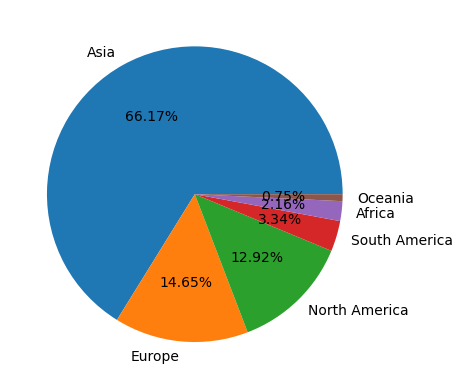

In [26]:
keys  = visa_df.value_counts('continent').keys()
values  = visa_df.value_counts('continent').values
plt.pie(values,labels=keys, autopct='%0.2f%%')
plt.show()

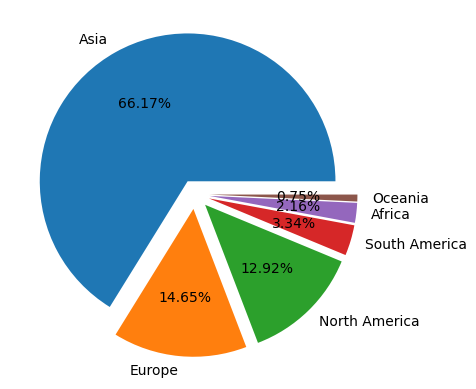

In [31]:
keys  = visa_df.value_counts('continent').keys()
values  = visa_df.value_counts('continent').values
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1],
        labels=keys, 
        autopct='%0.2f%%')
plt.show()

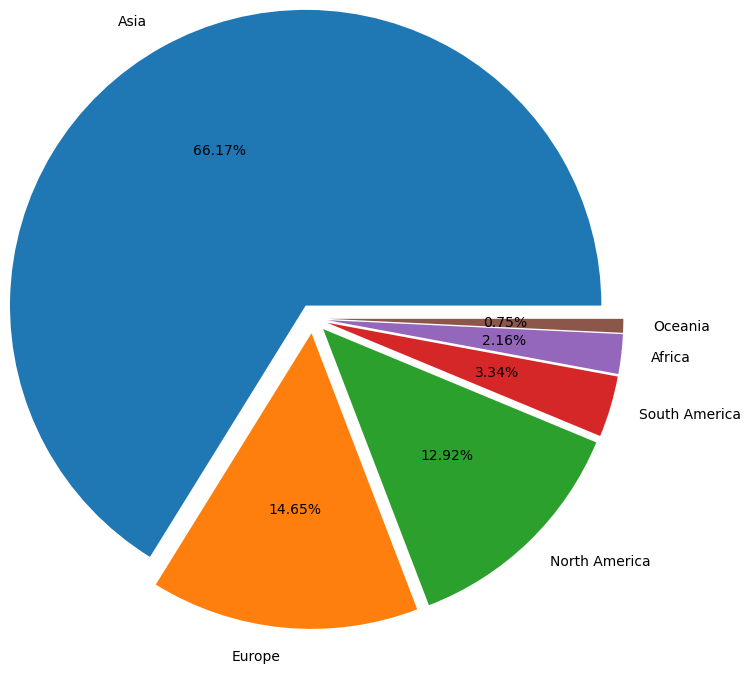

In [32]:
keys  = visa_df.value_counts('continent').keys()
values  = visa_df.value_counts('continent').values
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1],
        labels=keys, 
        autopct='%0.2f%%',
        radius=2)
plt.show()

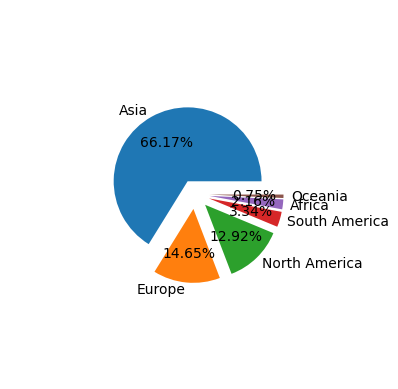

In [33]:
keys  = visa_df.value_counts('continent').keys()
values  = visa_df.value_counts('continent').values
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1],
        labels=keys, 
        autopct='%0.2f%%',
        radius=0.5)
plt.show()

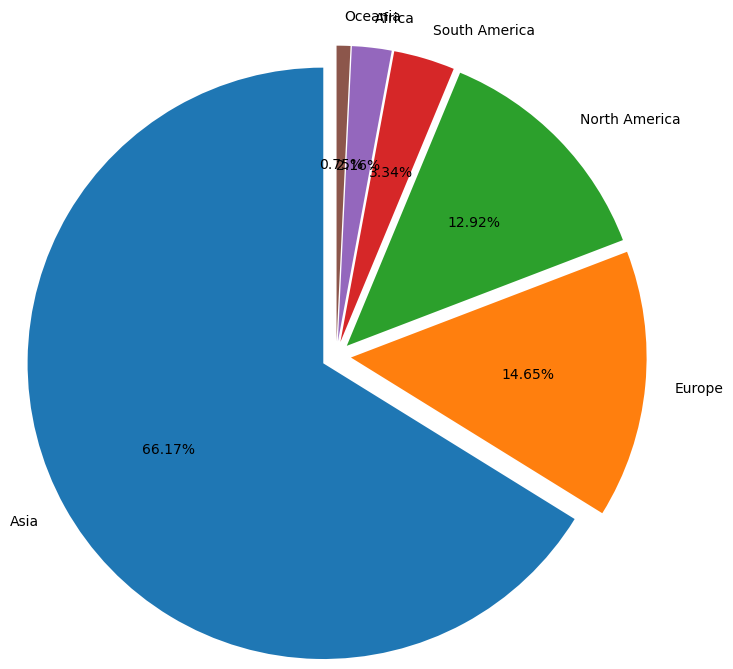

In [36]:
keys  = visa_df.value_counts('continent').keys()
values  = visa_df.value_counts('continent').values
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1],
        labels=keys, 
        autopct='%0.2f%%',
        radius=2,
       startangle=90)
plt.show()